In [3]:
import sys
print(sys.executable)

c:\Users\satya\OneDrive\Documents\Work\CatLossModel\.venv\Scripts\python.exe


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf

In [5]:
cat_df = pd.read_csv('catastrophe_dataset.csv')
print("Dataset shape:", cat_df.shape)
cat_df.head()

Dataset shape: (10000, 11)


,PropertyID,State,Peril,InsuredValue_USD,ConstructionType,OccupancyType,YearBuilt,TotalDamage_USD,HazardScore,Loss_Ratio,Loss_Amount_USD
0,P00001,TENNESSEE,Earthquake,2.150326e+06,Wood,Commercial,2015,250000.0,0.805792,0.191890,412626.268272
1,P00002,FLORIDA,Hurricane,4.027072e+06,Wood,Commercial,2012,250000.0,0.805792,0.172791,695843.588802
2,P00003,PENNSYLVANIA,Flood,2.739631e+06,Steel,Industrial,1971,0.0,0.000000,0.000000,0.000000
3,P00004,OKLAHOMA,Flood,1.570783e+06,Wood,Commercial,1960,150000.0,0.772675,0.292047,458742.551227
4,P00005,OHIO,Wildfire,1.409204e+06,Wood,Industrial,1978,250000.0,0.805792,0.233466,329001.433405


In [6]:
print(cat_df.info())        

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   PropertyID        10000 non-null  object 
 1   State             10000 non-null  object 
 2   Peril             10000 non-null  object 
 3   InsuredValue_USD  10000 non-null  float64
 4   ConstructionType  10000 non-null  object 
 5   OccupancyType     10000 non-null  object 
 6   YearBuilt         10000 non-null  int64  
 7   TotalDamage_USD   10000 non-null  float64
 8   HazardScore       10000 non-null  float64
 9   Loss_Ratio        10000 non-null  float64
 10  Loss_Amount_USD   10000 non-null  float64
dtypes: float64(5), int64(1), object(5)
memory usage: 859.5+ KB
None


In [7]:
cat_df.describe()

,InsuredValue_USD,YearBuilt,TotalDamage_USD,HazardScore,Loss_Ratio,Loss_Amount_USD
count,1.000000e+04,10000.000000,1.000000e+04,10000.000000,10000.000000,1.000000e+04
mean,2.547571e+06,1986.273000,1.618772e+07,0.798093,0.147603,3.752395e+05
std,1.419656e+06,21.453361,1.551351e+08,0.186419,0.103091,3.649440e+05
min,1.000456e+05,1950.000000,0.000000e+00,0.000000,0.000000,0.000000e+00
25%,1.316668e+06,1968.000000,2.500000e+05,0.805792,0.073050,1.207341e+05
50%,2.536067e+06,1987.000000,2.500000e+05,0.805792,0.122381,2.645474e+05
75%,3.779367e+06,2005.000000,2.500000e+05,0.805792,0.198923,5.084350e+05
max,4.999466e+06,2023.000000,1.671446e+09,1.376802,0.854468,3.534932e+06


In [8]:
cat_df[cat_df.isna().any(axis=1)]

,PropertyID,State,Peril,InsuredValue_USD,ConstructionType,OccupancyType,YearBuilt,TotalDamage_USD,HazardScore,Loss_Ratio,Loss_Amount_USD


In [11]:
print("Exposure overview:")

exposure_cols = ["InsuredValue_USD","HazardScore","YearBuilt","ConstructionType","OccupancyType","Peril"]
print(cat_df[exposure_cols].head())

Exposure overview:
   InsuredValue_USD  HazardScore  YearBuilt ConstructionType OccupancyType  \
0      2.150326e+06     0.805792       2015             Wood    Commercial   
1      4.027072e+06     0.805792       2012             Wood    Commercial   
2      2.739631e+06     0.000000       1971            Steel    Industrial   
3      1.570783e+06     0.772675       1960             Wood    Commercial   
4      1.409204e+06     0.805792       1978             Wood    Industrial   

        Peril  
0  Earthquake  
1   Hurricane  
2       Flood  
3       Flood  
4    Wildfire  


In [12]:
print("Exposure Summary Statistics:")
print(cat_df[exposure_cols].describe())

Exposure Summary Statistics:
       InsuredValue_USD   HazardScore     YearBuilt
count      1.000000e+04  10000.000000  10000.000000
mean       2.547571e+06      0.798093   1986.273000
std        1.419656e+06      0.186419     21.453361
min        1.000456e+05      0.000000   1950.000000
25%        1.316668e+06      0.805792   1968.000000
50%        2.536067e+06      0.805792   1987.000000
75%        3.779367e+06      0.805792   2005.000000
max        4.999466e+06      1.376802   2023.000000


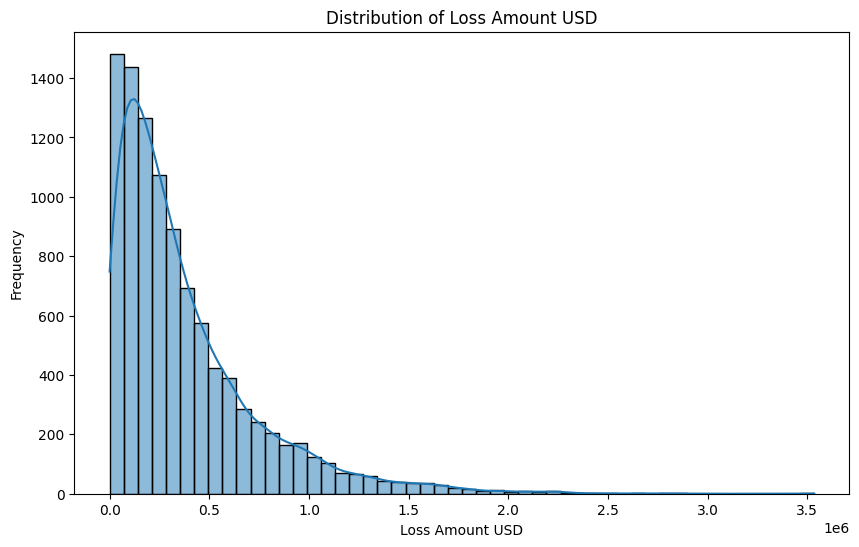

In [13]:
plt.figure(figsize=(10, 6))
sns.histplot(cat_df['Loss_Amount_USD'], bins=50, kde=True)
plt.title('Distribution of Loss Amount USD')
plt.xlabel('Loss Amount USD')
plt.ylabel('Frequency')
plt.show()

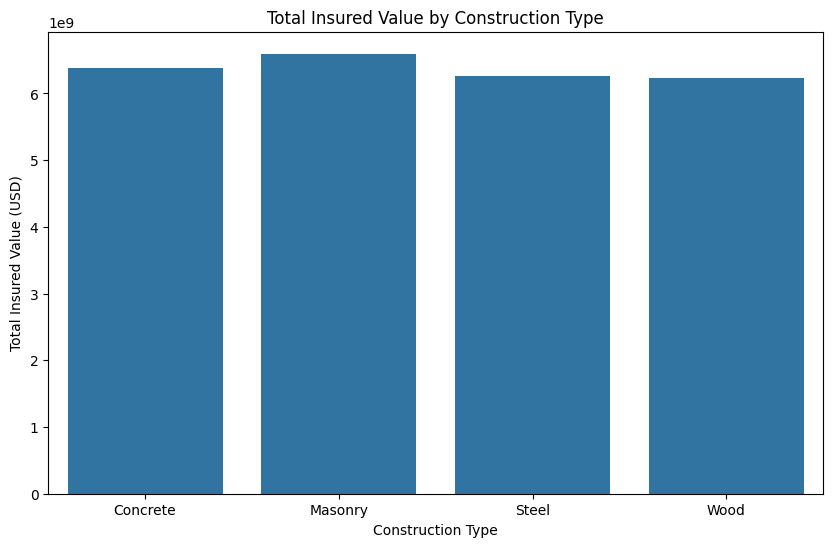

In [14]:
plt.figure(figsize=(10, 6))
exposure_by_construction = cat_df.groupby('ConstructionType')['InsuredValue_USD'].sum().reset_index()
sns.barplot(data=exposure_by_construction, x='ConstructionType', y='InsuredValue_USD')
plt.title('Total Insured Value by Construction Type')
plt.xlabel('Construction Type')
plt.ylabel('Total Insured Value (USD)')
plt.show()

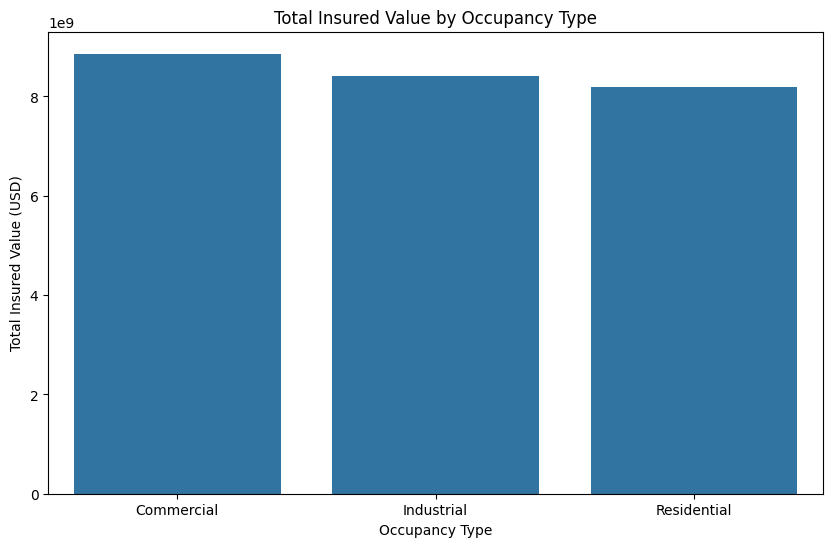

In [15]:
plt.figure(figsize=(10, 6))
exposure_by_occupancy = cat_df.groupby('OccupancyType')['InsuredValue_USD'].sum().reset_index()
sns.barplot(data=exposure_by_occupancy, x='OccupancyType', y='InsuredValue_USD')
plt.title('Total Insured Value by Occupancy Type')
plt.xlabel('Occupancy Type')
plt.ylabel('Total Insured Value (USD)')
plt.show()